In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Ruta al archivo
file_path_con = r"C:\Users\Usuario\Documents\Datos EEG\ASEM_EEG\ERP\Congruent_ASEM.mat"
file_path_inc = r"C:\Users\Usuario\Documents\Datos EEG\ASEM_EEG\ERP\Incongruent_ASEM.mat"

file_path_con_2 = r"C:\Users\Usuario\Documents\Datos EEG\ASEM_EEG\ERP\Congruent_ASEM_2.mat"
file_path_inc_2 = r"C:\Users\Usuario\Documents\Datos EEG\ASEM_EEG\ERP\Incongruent_ASEM_2.mat"



In [ ]:
import scipy.io
import h5py
import numpy as np

def load_mat_file(file_path):
 
    try:
        # Intentar cargar como v7.2 o inferior
        mat_data = scipy.io.loadmat(file_path)
        print(f"Archivo {file_path} cargado con scipy.io.loadmat")
    except NotImplementedError:
        # Si falla, cargar como v7.3 (HDF5)
        with h5py.File(file_path, 'r') as mat_file:
            print(f"Archivo {file_path} cargado con h5py.File")
            mat_data = {key: np.array(mat_file[key]) for key in mat_file.keys()}
    
    return mat_data

# Rutas de los archivos
file_paths = [
    r"C:\Users\Usuario\Documents\Datos EEG\ASEM_EEG\ERP\Congruent_ASEM.mat",
    r"C:\Users\Usuario\Documents\Datos EEG\ASEM_EEG\ERP\Incongruent_ASEM.mat",
    r"C:\Users\Usuario\Documents\Datos EEG\ASEM_EEG\ERP\Congruent_ASEM_2.mat",
    r"C:\Users\Usuario\Documents\Datos EEG\ASEM_EEG\ERP\Incongruent_ASEM_2.mat"
]

files = ['con', 'inc', 'con_2', 'inc_2']

# Leer todos los archivos
data_dicts = {}
for file_name, file_path in zip(files, file_paths):
    data_dicts[file_name] = load_mat_file(file_path)

# Acceso a los datos
#for file_name, data in data_dicts.items():
#    print(f"Datos del archivo {file_name}:")
#    for key in data.keys():
#        print(f"  - {key}: {data[key].shape if isinstance(data[key], np.ndarray) else 'No ndarray'}")


In [11]:
# Inspeccionar la forma de EEGData
print(data_dicts['con']['EEGData'].shape)


(64, 614)


In [12]:
import numpy as np

def normalize_eeg_data(data, axis_time=1):
    """
    Normaliza las dimensiones de los datos EEG.
    Si la dimensión del tiempo no está en el eje `axis_time`, se transpone.
    """
    return data if data.shape[axis_time] >= data.shape[1 - axis_time] else data.T

def extract_and_normalize_data(mat_data):
    """
    Extrae y normaliza los datos EEG, EEGTime y Markers de un archivo.
    Retorna los datos normalizados o `None` si no se encuentran.
    """
    eeg_data = None
    eeg_time = None
    markers = None

    try:
        # Extraer y normalizar EEGData
        if 'EEGData' in mat_data:
            eeg_data = normalize_eeg_data(mat_data['EEGData'])
        else:
            print(f"Advertencia: No se encontró 'EEGData'.")

        # Extraer EEGTime
        if 'EEGTime' in mat_data:
            eeg_time = np.array(mat_data['EEGTime']).squeeze()
        else:
            print(f"Advertencia: No se encontró 'EEGTime'.")

        # Extraer Markers
        if 'Markers' in mat_data:
            markers = np.array(mat_data['Markers']).squeeze()
        else:
            print(f"Advertencia: No se encontró 'Markers'.")

    except Exception as e:
        print(f"Error procesando archivo: {e}")

    return eeg_data, eeg_time, markers

# Diccionarios para almacenar los resultados
EEG_data = {}
eeg_time_dict = {}
eeg_markers_dict = {}

# Procesar todos los archivos
for key, mat_data in data_dicts.items():
    eeg_data, eeg_time, markers = extract_and_normalize_data(mat_data)
    if eeg_data is not None:
        EEG_data[key] = eeg_data
    if eeg_time is not None:
        eeg_time_dict[key] = eeg_time
    if markers is not None:
        eeg_markers_dict[key] = markers

# Verificar dimensiones de los datos normalizados
dimensions = {key: data.shape for key, data in EEG_data.items()}
print(f"Dimensiones normalizadas de los datos: {dimensions}")

# Resumen final
print("\nResumen:")
print(f"Diccionario EEG_data: {list(EEG_data.keys())}")
print(f"Diccionario eeg_time: {list(eeg_time_dict.keys())}")
print(f"Diccionario eeg_markers: {list(eeg_markers_dict.keys())}")


Dimensiones normalizadas de los datos: {'con': (64, 614), 'inc': (64, 614), 'con_2': (64, 614), 'inc_2': (64, 614)}

Resumen:
Diccionario EEG_data: ['con', 'inc', 'con_2', 'inc_2']
Diccionario eeg_time: ['con', 'inc', 'con_2', 'inc_2']
Diccionario eeg_markers: ['con', 'inc', 'con_2', 'inc_2']


In [ ]:
import pandas as pd

# Suponiendo que `electrode_data` es el contenido de mat_data['Properties']
electrodes = []
for e in data_dicts['con']['Properties'][0][0][5][0]:
    electrode = {
        'Name': e[0][0],
        'X_coord': e[1][0][0],
        'Y_coord': e[3][0][0],
        'Property1': e[2][0][0],
        'Property2': e[4][0][0],
    }
    electrodes.append(electrode)

df_electrodes = pd.DataFrame(electrodes)
print(df_electrodes.head())


In [ ]:
data_dicts['con']

In [15]:
df_electrodes = pd.read_excel('electrodos.xlsx')


In [ ]:
import numpy as np

pools = {
    "FrontoCentral": ['C1', 'C2', 'Cz', 'FC1', 'FC2', 'FCz'],
    "Fronto": ['F1', 'F2', 'FC1', 'FC2', 'FCz', 'Fz'],
    "Frontal": ['F1', 'F2', 'FCz', 'Fz'],
    "Cz": ['Cz'],
    "Parietal": ['POz', 'Pz'],
    "Occipital": ['Iz', 'O1', 'O2', 'Oz']
}

EEG_pool_data = {}

# Para cada condición en EEG_data (con, rel, unr, con_2, rel_2, unr_2)
for condition, data in EEG_data.items():
    # Crear el diccionario para cada condición
    pool_dict = {}
    for pool_name, electrodes in pools.items():
        indices = [df_electrodes['Name'].str.contains(e).idxmax() for e in electrodes]
        pool_data = data[indices, : ]
        pool_dict[pool_name] = np.mean(pool_data, axis=0)
    EEG_pool_data[condition] = pool_dict

print(EEG_pool_data)


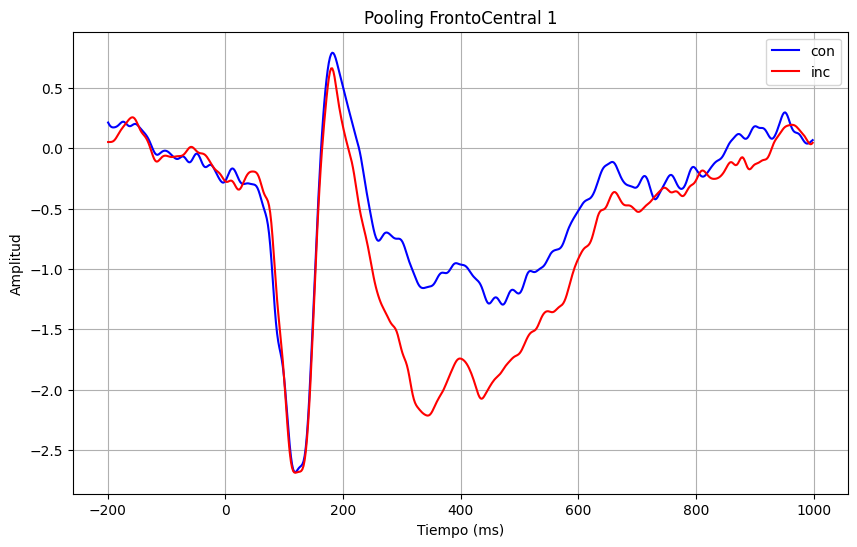

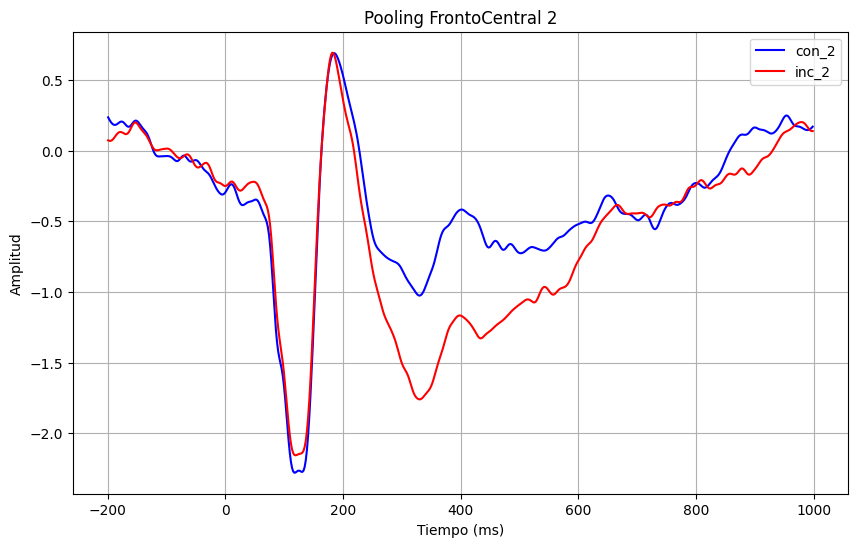

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular EEG_pool_data
def compute_pool_data(EEG_data, pools, df_electrodes):
    EEG_pool_data = {}
    for condition, data in EEG_data.items():
        pool_dict = {}
        for pool_name, electrodes in pools.items():
            indices = [df_electrodes['Name'].str.contains(e).idxmax() for e in electrodes]
            pool_data = data[indices, :]
            pool_dict[pool_name] = np.mean(pool_data, axis=0)
        EEG_pool_data[condition] = pool_dict
    return EEG_pool_data

# Función para graficar datos
def plot_pooled_data(time_dict, EEG_pool_data, condition_keys, pool_name, title):
    plt.figure(figsize=(10, 6))
    colors = ['b', 'r']
    for i, condition in enumerate(condition_keys):
        time = time_dict[condition]
        signal = EEG_pool_data[condition][pool_name]
        plt.plot(time, signal, label=condition, color=colors[i])
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Amplitud')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Diccionarios y configuraciones iniciales
pools = {
    "FrontoCentral": ['C1', 'C2', 'Cz', 'FC1', 'FC2', 'FCz'],
    "Fronto": ['F1', 'F2', 'FC1', 'FC2', 'FCz', 'Fz'],
    "Frontal": ['F1', 'F2', 'FCz', 'Fz'],
    "Cz": ['Cz'],
    "Parietal": ['POz', 'Pz'],
    "Occipital": ['Iz', 'O1', 'O2', 'Oz']
}

# Calcular los datos agrupados
EEG_pool_data = compute_pool_data(EEG_data, pools, df_electrodes)

# Graficar las señales
plot_pooled_data(
    eeg_time_dict, 
    EEG_pool_data, 
    ['con', 'inc'], 
    'FrontoCentral', 
    'Pooling FrontoCentral 1'
)

plot_pooled_data(
    eeg_time_dict, 
    EEG_pool_data, 
    ['con_2', 'inc_2'], 
    'FrontoCentral', 
    'Pooling FrontoCentral 2'
)
